In [1]:
%matplotlib inline

In [2]:
# Importing the CSV #
import pandas as pd # for Dataframes
import numpy as np # for arrays
import sklearn # for machine learning
from sklearn.preprocessing import StandardScaler # for preprocessing library
import matplotlib.pyplot as plt # for visualization of data

## import settings
pd.set_option('display.max_columns', None)

dataframe_all = pd.read_csv('training.csv', low_memory=False)
num_rows = dataframe_all.shape
print(num_rows)

print(dataframe_all.head(5))

# VARIABLES # 
# dataframe_all = imported csv
# num_rows = how many rows in the filesheet (row = number of records)

(28126, 184)
   Unnamed: 0    cuid  convert_30  revenue_30     roll_up currentstatus  \
0       26991  481824           1  34986.6899   Retention        Active   
1        6975  133198           1  24539.7132  Onboarding        Active   
2        5515  106829           1  19729.0900  Onboarding      Enrolled   
3       27146  483541           1  18199.7000   Retention      Enrolled   
4         314    6426           1  13972.1200  Onboarding      Enrolled   

  companytypegroup team        customersource accrole num_employees  \
0            Trade   US  Internal Application    None          None   
1         Business   US  External Application    None          2to5   
2            Trade   US  Internal Application    None          None   
3         Business   US                 Other    None          None   
4            Trade   US  Internal Application    None          2to5   

  num_purchases_year cost_purchases_year enrollmentmethod  numorderone  \
0               None               

In [3]:
# Data Statistics  
# function that returns: Totals in each category
# return form: [Var Output], [printable Output]
# Params: (dataset= var:dataframe_all, column= String, feature column in dataset, colCompr= String, another feature for comparison, categ= [StringList]: categories in the target feature columns)
#
# 

def statsTotals(dataset, column, colCompr, categ):
    assert(type(dataset) == type(pd.DataFrame())) # dataset = class DataFrame
    assert(type(column) == type(str())) # column = String
    assert(type(colCompr) == type(str())) # colCompr = String
    assert(type(categ) == type(list())) # categ = (String) List
    
    # Local VARS #
    num_rows = dataset.shape[0] # get number of rows for data
    num_categs = len(categ) # get how many categories were imputed

    # create a list to hold the counts
    # for each of the categories, how many are in that category? How many were "True" in that category compared to "False"?
    cntInEachCat = []
    for i in range(num_categs):
        cntInEachCat.append(0) # number True in the category 
        cntInEachCat.append(0) # number not True in the category
        cntInEachCat.append(0) # Total Revenue in that category

    # Logic to return Var: cntInEachCat = [False, True, How much,] * number of categories    
    for row in range(num_rows): # for each data file in file
        for cat in range(num_categs): # For each of the categories the file could be 
            if(dataframe_all.loc[row][column] == categ[cat]): # for each of those categories, if the file is of that category type
#                 print(dataframe_all.loc[row][column])
                assert(type(dataframe_all.loc[row][colCompr]))
                if(dataframe_all.loc[row][colCompr] > 0): # if the comparison row, (e.g. "revenue_30"), is greater than zero
                    cntInEachCat[cat*(num_categs+(3-num_categs))+1] += 1 # if datafile was "True" or 1
                    cntInEachCat[cat*(num_categs+(3-num_categs))+2] += dataframe_all.loc[row][colCompr] # how much for the True datafile
                else:
                    cntInEachCat[cat*(num_categs+(3-num_categs))] += 1 # if datafile was "False" or 0
    
#     statistics = []
    for cat in range(num_categs):
        total = cntInEachCat[cat*(num_categs+(3-num_categs))] + cntInEachCat[cat*(num_categs+(3-num_categs))+1]        
        trueFalse = (cntInEachCat[cat*(num_categs+(3-num_categs))+1], "to", cntInEachCat[cat*(num_categs+(3-num_categs))])
        try:
            pcntTrueVsTotal = cntInEachCat[cat*(num_categs+(3-num_categs))+1] / total
        except ZeroDivisionError:
             pcntTrueVsTotal = "division by zero error"
        howMuchTotal = cntInEachCat[cat*(num_categs+(3-num_categs))+2]
        try:
            howMuchPerCatAvg = cntInEachCat[cat*(num_categs+(3-num_categs))+2] / cntInEachCat[cat*(num_categs+(3-num_categs))+1]
        except ZeroDivisionError:
             howMuchPerCatAvg = "division by zero error"

        print(categ[cat], "Total:", total)
        print(categ[cat], "True/False:", trueFalse)
        print(categ[cat], "% True of Total:", pcntTrueVsTotal)
        print(categ[cat], "HowMuch Total:", howMuchTotal)
        print(categ[cat], "HowMuch per True:", howMuchPerCatAvg)
        print()
        
#         statistics = [total, trueFalse, pcntTrueVsTotal, howMuchTotal, howMuchPerCatAvg]
    return cntInEachCat

# roll_up = statsTotals(dataframe_all, "roll_up", "revenue_30", ["Onboarding", "Unmanaged", "Retention"])
# print(roll_up)

currentstatus = statsTotals(dataframe_all, "currentstatus", "revenue_30", ["Active", "Enrolled"])
print(currentstatus)

Active Total: 9918
Active True/False: (1699, 'to', 8219)
Active % True of Total: 0.171304698527929
Active HowMuch Total: 1171406.1233999878
Active HowMuch per True: 689.4679949381917

Enrolled Total: 18199
Enrolled True/False: (1228, 'to', 16971)
Enrolled % True of Total: 0.06747623495796472
Enrolled HowMuch Total: 938996.2516999918
Enrolled HowMuch per True: 764.6549280944558

[8219, 1699, 1171406.1233999878, 16971, 1228, 938996.2516999918]


FILENAME: roll_up-revenue_30-IndividualRevenues.sav


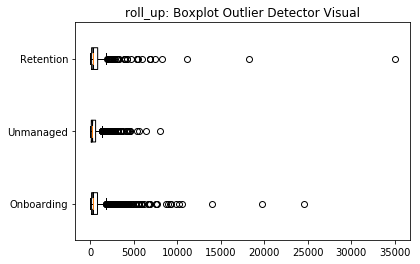

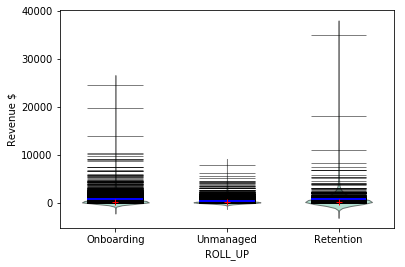

In [4]:
import statsmodels.api as sm
import pickle

# Data Visualization of True data sets
def dataCollection(dataset, column, colCompr, categ, override):
    assert(type(dataset) == type(pd.DataFrame())) # dataset = class DataFrame
    assert(type(column) == type(str())) # column = String
    assert(type(colCompr) == type(str())) # colCompr = String
    assert(type(categ) == type(list())) # categ = (String) List
    
    # Local VARS #
    num_rows = dataset.shape[0] # get number of rows for data
    num_categs = len(categ) # get how many categories were imputed

    # create a list to hold the counts
    # for each of the categories, how many are in that category? How many were "True" in that category compared to "False"?
    revLists = []
    labels = ""
    for i in range(num_categs):
        revLists.append([]) # number True in the category 
        labels = labels +" " + categ[i]
    
    if(override):
#         # Logic to return Var: cntInEachCat = [False, True, How much] * number of categories    
        for row in range(num_rows): # for each row in file 
            for cat in range(num_categs): # For each of the categories the file could be 
                if(dataframe_all.loc[row][column] == categ[cat]): # for each of those categories, if the file is of that category type
                    if(dataframe_all.loc[row][colCompr] > 0): # if the comparison row, (e.g. "revenue_30"), is greater than zero
                        revLists[cat].append(dataframe_all.loc[row][colCompr])

        # Save query data to file                
        filename = column + "-" + colCompr + "-" + "IndividualRevenues.sav"
#         print(revLists)
        pickle.dump(revLists, open(filename, 'wb'))
        print(filename)
    else:
        # Get queryed data from file
        filename = column + "-" + colCompr + "-" + "IndividualRevenues.sav"
        revLists = pickle.load(open(filename, 'rb'))
        print("FILENAME:", filename)
        graphing(column, categ, revLists)
        return filename
        
def graphing(column, categ, revLists):      
    # Graphing #    
    # 5/1 if category doesnt have more than ~linearError
    f1, ax1 = plt.subplots()
    ax1.set_title(column + ": " + 'Boxplot Outlier Detector Visual')
    ax1.boxplot(revLists, labels=categ, notch=True, vert = False, showfliers = True)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    sm.graphics.beanplot(revLists, ax=ax, labels=categ)
    ax.set_xlabel(column.upper())
    ax.set_ylabel("Revenue $")

    plt.show()
    

# var = dataCollection(dataframe_all, "roll_up", "revenue_30", ["Onboarding", "Unmanaged", "Retention"], True)
var1 = dataCollection(dataframe_all, "roll_up", "revenue_30", ["Onboarding", "Unmanaged", "Retention"], False)
# var = statsTotals(dataframe_all, "currentstatus", "revenue_30", ["Active", "Enrolled"])
# print(var)
    
    

In [ ]:
# Data Cleaning